<a href="https://colab.research.google.com/github/MadhuraTonpe165/InClassLiveCodingBooks/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''
Question 1 ->
Import ds_salaries data into Jupter Notebook and get an idea about the data
'''

In [ ]:
#Solution - >
df = pd.read_csv('/content/ds_salaries (1).csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
'''
 Question 2 ->
 Get an idea about duplicates in the data and NULL values in the data
 and treat them if necessary
'''

In [ ]:
#Getting idea about duplicates in the data
df.duplicated().sum()

1171

In [ ]:
# Total 1171 duplicate records

In [ ]:
# Dropping the duplicate records
df.drop_duplicates(inplace= True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# No Duplicate reords in daat now

In [ ]:
#Checking NULL data values
df.isnull().sum().any()

False

In [ ]:
# No Null Values

In [ ]:
'''
Question 3 - >
Get an idea about the data types of the columns
and comment whether they are in correct data types
'''

In [ ]:
# Solution ->


In [ ]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [ ]:
'''
Conclusion ->
All the columns are in correct data types as expected
'''

In [ ]:
'''
Perform Statictical analysis on data and comment on it
'''

In [ ]:
df.describe().T

NameError: name 'df' is not defined

In [ ]:
'''
Conclusions ->
(1) from the year column , we can say that we have the data from 2020 to 2023
(2) from "salary" and "Salary_in_usd" columns, we can see that mean is siginficantly greater than median, implying there are outliers in nright tail.
(3) From "Remote_ratio" , we can say that mean and median are approximately same,
implying that the data is not skewed
'''

In [ ]:
'''
Question 5 - >
Perform correlation analysis on the data and comment on it.
'''

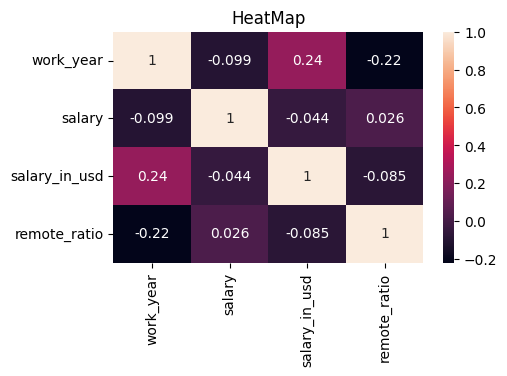

In [ ]:
#
plt.figure(figsize = (5,3))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title('HeatMap')
plt.show()

In [ ]:
'''
Conclusions ->
(1) "Salary_in_usd" and "work_year" have a weak positive correlation means salary hike is not sifgnificantly increased compared to years
(2) "work_year" and "remote_ratio" have a weak negative correlation remote culture is not prefreeded
(3) "Salary_in_usd" and "remote_ratio" have aperfectly uncorrelated relationship
'''

In [ ]:
'''
Question 6 ->
Find the number of unique job titles and display the top 5 most frequesnt job titles
'''

In [ ]:
print('Number of unique job titles :', df['job_title'].nunique())

Number of unique job titles : 93


In [ ]:
# Getting top 5 job titles/most frequent jobs
df["job_title"].value_counts().head()

,count
job_title,
Data Engineer,598
Data Scientist,538
Data Analyst,396
Machine Learning Engineer,206
Analytics Engineer,91


In [ ]:
'''
Question ->
Plt a histogram of the "salary_in_usd" and comment on it
'''

Text(0, 0.5, 'Frequency')

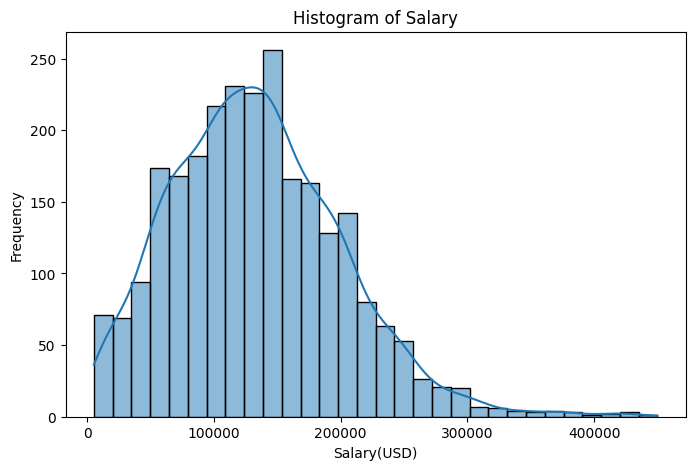

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(x = df['salary_in_usd'], bins = 30, kde = True)
plt.title('Histogram of Salary_in_USD)')
plt.xlabel('Salary(USD)')
plt.ylabel('Frequency')

In [ ]:
# From the above plot, we can say that the data is showing approx normally distribution
# with a long right tail implying tha there are outliers in the right tail

In [ ]:
'''
Question ->
Display the average salary for each job title and sort it in descending order comment on it
'''

In [ ]:
df.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending = False)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
...,...
Autonomous Vehicle Technician,26277.50
3D Computer Vision Researcher,21352.25
Staff Data Analyst,15000.00


In [ ]:
'''
Question ->
Display the average salary for each job title and sort it in descending order (without groupby)
'''

In [ ]:
# Solution - >
salary_sum = {}
count = {}

for _, row in df.iterrows(): # _ indixcated index
  job = row['job_title']
  salary = row['salary_in_usd']

  if job in salary_sum:
    salary_sum[job] += salary
    count[job] +=1
  else:
    salary_sum[job] = salary
    count[job] = 1


#Calculating the average
avg_salaries = {job : (salary_sum[job] / count[job]) for job in salary_sum}

# Converting to DataFrames
avg_salries_df = pd.DataFrame(avg_salaries.items(), columns = ['Job_Titles', 'Avg Salaries'])
print(avg_salries_df.sort_values(by = 'Avg Salaries' , ascending = False))

                       Job_Titles  Avg Salaries
75         Data Science Tech Lead    375000.000
86           Cloud Data Architect    250000.000
64                      Data Lead    212500.000
63            Data Analytics Lead    211254.500
0        Principal Data Scientist    198171.125
..                            ...           ...
37  Autonomous Vehicle Technician     26277.500
70  3D Computer Vision Researcher     21352.250
22             Staff Data Analyst     15000.000
81         Product Data Scientist      8000.000
80             Power BI Developer      5409.000

[93 rows x 2 columns]


In [ ]:
'''
Question 10 - >
Plot "Company Location" and "Average Salary"
'''

In [ ]:
#Getting column names
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
# Solution - >

In [ ]:
# Data ->
print(df.groupby('company_location')['salary_in_usd'].mean().round(2).sort_values(ascending = False))

company_location
IL    271446.50
PR    167500.00
US    152374.79
RU    140333.33
CA    130572.76
        ...    
VN     12000.00
AL     10000.00
MA     10000.00
BO      7500.00
MK      6304.00
Name: salary_in_usd, Length: 72, dtype: float64


In [ ]:
# Solution
df2 = df.groupby('company_location')['salary_in_usd'].mean().round(2).sort_values(ascending = False).head(10)


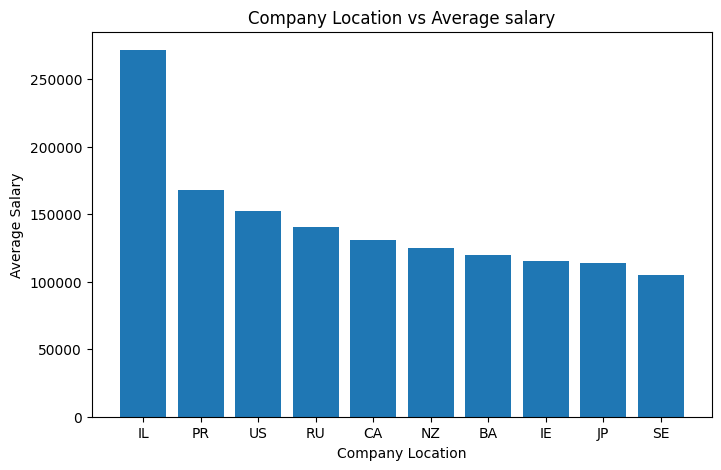

In [ ]:
# Plot
plt.figure(figsize = (8, 5))
plt.bar(df2.index, df2.values)
plt.title('Company Location vs Average salary')
plt.xlabel('Company Location')
plt.ylabel('Average Salary')
plt.show()